In [5]:
# Importar pandas
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

#Importar altres llibreries
import matplotlib.pyplot as plt #genera gràfics a partir de continguts en llistes, vector amb py i amb l'extensió NumPy
import seaborn as sns #llibreria especialitzada en visualització de dades per py desenvolupada amb matplotlib  i ofereix interficie d'alt nivell
#import squarify
import plotly.express as px
import numpy as np
import warnings

#Establir connexió
engine = create_engine("mysql+pymysql://root@localhost/facultad")
cnx = engine.connect()

#Generar Dataframes
inspector = inspect(engine)
nombre_tablas = inspector.get_table_names()

for table in nombre_tablas:
    query = f"select  * from {table}"
    globals ()[f"df_{table}"] = pd.read_sql(query, cnx)

In [8]:
nombre_tablas

['alumno',
 'asignatura',
 'curso',
 'impartir',
 'matricula',
 'profesor',
 'tlfcontactoprof']

In [19]:
df_impartir.shape

(300, 2)

#### columnes d'un df

In [24]:
df_impartir.columns

Index(['idProfesor', 'idAsignatura'], dtype='object')

### desviacio nota

In [31]:
df_matricula["nota"].std()

2.8151779653923166

### Renombrar curso a cursos df_asignatura

In [46]:
df_asignatura.rename(columns={"curso":"cursos"})

,cursos,idAsignatura,nombre,cuatrimestre,creditos,caracter,coordinador
0,1.0,AS001,Algebra lineal,2,6.0,obligatoria,PR001
1,1.0,AS002,Análisis exploratorio de datos,1,6.0,obligatoria,PR002
2,1.0,AS003,Análisis matemático,1,6.0,obligatoria,PR003
3,1.0,AS004,Fundamentos de computadores y sistemas operativos,2,6.0,obligatoria,PR004
4,1.0,AS005,Fundamentos de organización de empresas,1,6.0,obligatoria,PR005
...,...,...,...,...,...,...,...
95,6.0,AS096,Gestión y explotación de almacenes de datos,1,0.0,optativa,PR002
96,6.0,AS097,Redes neuronales y algoritmos genéticos,1,0.0,optativa,PR037
97,6.0,AS098,Gestión de relaciones con el cliente CRM,2,0.0,optativa,PR005
98,6.0,AS099,Inteligencia de negocio y cuadro de mando inte...,2,0.0,optativa,PR005


### Mostrar taula asignaturas sólo obligatorias

In [ ]:
df_asignatura

In [70]:
df_asignatura[df_asignatura["caracter"]=="obligatoria"]
#df_asignatura_obligatoria = df_asignatura[obligatoria]

,curso,idAsignatura,nombre,cuatrimestre,creditos,caracter,coordinador
0,1.0,AS001,Algebra lineal,2,6.0,obligatoria,PR001
1,1.0,AS002,Análisis exploratorio de datos,1,6.0,obligatoria,PR002
2,1.0,AS003,Análisis matemático,1,6.0,obligatoria,PR003
3,1.0,AS004,Fundamentos de computadores y sistemas operativos,2,6.0,obligatoria,PR004
4,1.0,AS005,Fundamentos de organización de empresas,1,6.0,obligatoria,PR005
5,1.0,AS006,Fundamentos de programación,1,6.0,obligatoria,PR004
6,1.0,AS007,Matemáticas discretas,1,6.0,obligatoria,PR003
7,1.0,AS008,Modelos estadísticos para la toma de decisiones I,2,6.0,obligatoria,PR008
8,1.0,AS009,Programación,2,6.0,obligatoria,PR004
9,1.0,AS010,Proyecto I. Comprensión de datos,2,6.0,obligatoria,PR002


In [ ]:
obligatoria = df_asignatura[df_asignatura["caracter"]=="obligatoria"]
obligatoria

### Creem columna i la borrem

In [142]:
df_matricula["columna_borrar"]="registres a borrar"

In [148]:
df_matricula = df_matricula.drop(columns="columna_borrar")

In [150]:
df_matricula

,idAlumno,idAsignatura,nota,nota_6
0,AL003,AS001,6.99,True
1,AL003,AS002,9.71,True
2,AL003,AS003,10.00,True
3,AL003,AS004,8.89,True
4,AL003,AS005,8.49,True
...,...,...,...,...
1724,AL174,AS095,10.00,True
1725,AL178,AS099,1.17,False
1726,AL181,AS095,3.01,False
1727,AL191,AS095,7.55,True


### Creem columna condicional df_matricula calculem nota + 6

In [85]:
df_matricula[df_matricula["nota"]>6]

,idAlumno,idAsignatura,nota
0,AL003,AS001,6.99
1,AL003,AS002,9.71
2,AL003,AS003,10.00
3,AL003,AS004,8.89
4,AL003,AS005,8.49
...,...,...,...
1718,AL125,AS095,10.00
1721,AL143,AS099,7.78
1723,AL173,AS095,6.71
1724,AL174,AS095,10.00


In [89]:
df_matricula["nota_6"] = df_matricula["nota"]>6


In [154]:
df_matricula["nota_6_2"] = np.where((df_matricula["nota"]>6), 1, 0)
#df_matricula["nota_6_2"] = np.where((df_matricula["nota"]>6), "És més gran de 6", "És menor de 6")

In [156]:
df_matricula

,idAlumno,idAsignatura,nota,nota_6,nota_6_2
0,AL003,AS001,6.99,True,1
1,AL003,AS002,9.71,True,1
2,AL003,AS003,10.00,True,1
3,AL003,AS004,8.89,True,1
4,AL003,AS005,8.49,True,1
...,...,...,...,...,...
1724,AL174,AS095,10.00,True,1
1725,AL178,AS099,1.17,False,0
1726,AL181,AS095,3.01,False,0
1727,AL191,AS095,7.55,True,1


### Gràfica df_asignatura col caracter

In [ ]:
df_asignatura["caracter"]

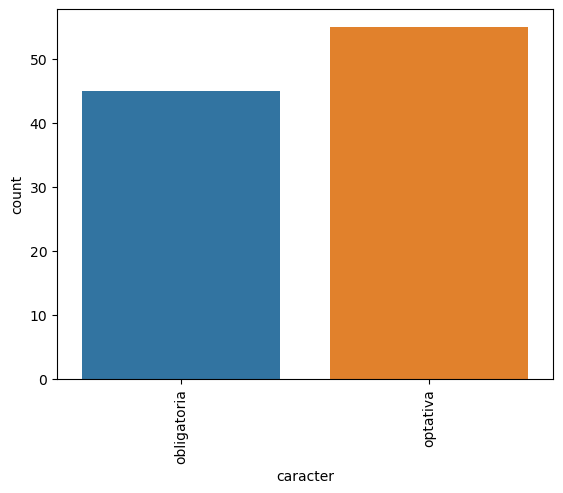

In [98]:
sns.countplot(x=df_asignatura["caracter"])
plt.xticks(rotation=90)
plt.show()

### Promedio nota alumno taula matricula

In [115]:
df_matricula[["idAlumno", "nota"]]

,idAlumno,nota
0,AL003,6.99
1,AL003,9.71
2,AL003,10.00
3,AL003,8.89
4,AL003,8.49
...,...,...
1724,AL174,10.00
1725,AL178,1.17
1726,AL181,3.01
1727,AL191,7.55


In [ ]:
# barplot hace la media automáticamente

In [ ]:
# las líneas grieses son el intervalo de confianza, previsión de datos futuros

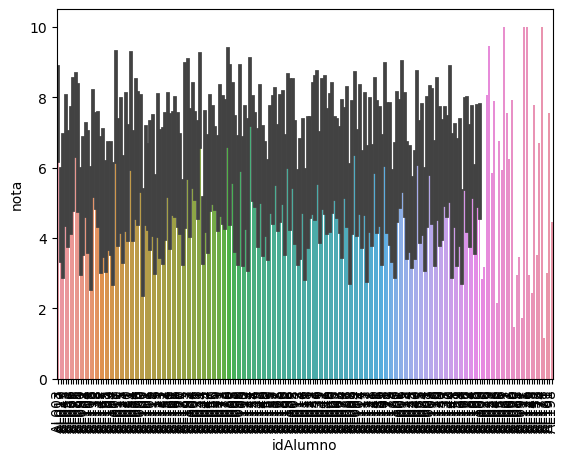

In [119]:
sns.barplot(df_matricula,x="idAlumno", y="nota")
plt.xticks(rotation=90)
plt.show()

In [105]:
df_matricula.columns

Index(['idAlumno', 'idAsignatura', 'nota', 'nota_6'], dtype='object')

### gràfic credit df_asinatura nota df_matricula

In [ ]:
df_asignatura

In [ ]:
df_matricula

In [127]:
#df_merged = df_asignatura.merge(df_matricula, how="inner", left_on="id", right_on="transaction_id")
df_merged = df_asignatura.merge(df_matricula, how="inner", on="idAsignatura")

df_merged

,curso,idAsignatura,nombre,cuatrimestre,creditos,caracter,coordinador,idAlumno,nota,nota_6
0,1.0,AS001,Algebra lineal,2,6.0,obligatoria,PR001,AL003,6.99,True
1,1.0,AS001,Algebra lineal,2,6.0,obligatoria,PR001,AL017,2.97,False
2,1.0,AS001,Algebra lineal,2,6.0,obligatoria,PR001,AL019,2.93,False
3,1.0,AS001,Algebra lineal,2,6.0,obligatoria,PR001,AL045,5.84,False
4,1.0,AS001,Algebra lineal,2,6.0,obligatoria,PR001,AL052,3.56,False
...,...,...,...,...,...,...,...,...,...,...
1724,6.0,AS100,Modelos de decisión en marketing,2,0.0,optativa,PR005,AL038,7.88,True
1725,6.0,AS100,Modelos de decisión en marketing,2,0.0,optativa,PR005,AL082,2.94,False
1726,6.0,AS100,Modelos de decisión en marketing,2,0.0,optativa,PR005,AL097,1.74,False
1727,6.0,AS100,Modelos de decisión en marketing,2,0.0,optativa,PR005,AL158,3.51,False


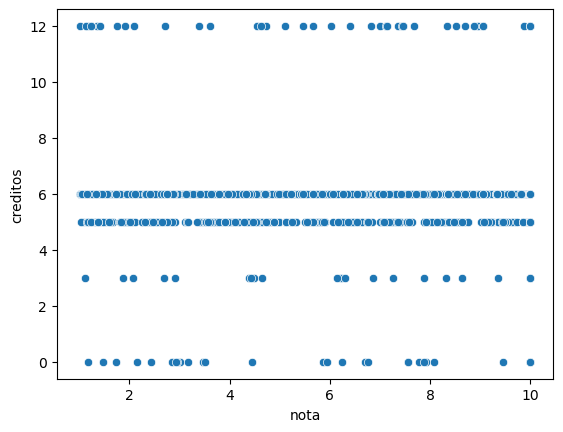

In [136]:
sns.scatterplot(df_merged, 
                        y="creditos",
                        x="nota",
                       # hue="declined",
                        
                        sizes=(100,500),
                        )
                        # ax=ejes[0])
#sns.lineplot(df_avocado,y="AveragePrice", x="Large Bags" )
plt.show()